In [1]:
import numpy as np
import networkx as nx
import itertools

def cut_weight(graph, S, T):
    """
    Calculate the cut weight for a directed, weighted graph.
    Parameters:
        graph: A NetworkX graph (directed/weighted).
        S: A set of nodes.
        T: The complementary set of nodes.
    Returns:
        Cut weight: Total weight of edges crossing from S to T.
    """
    cut_wt = 0
    for u, v in graph.edges():
        if u in S and v in T:
            cut_wt += graph[u][v].get('weight', 1)  # Default weight is 1
    return cut_wt

def cut_distance(graph1, graph2, num_samples=100):
    """
    Approximate the cut distance between two directed, weighted graphs.
    Parameters:
        graph1, graph2: Two NetworkX graphs with the same node set.
        num_samples: Number of random partitions to approximate the maximum.
    Returns:
        Approximate cut distance between the graphs.
    """
    # Ensure both graphs have the same set of nodes
    if set(graph1.nodes()) != set(graph2.nodes()):
        raise ValueError("Graphs must have the same node set.")

    nodes = list(graph1.nodes())
    n = len(nodes)
    max_diff = 0

    # Generate random bipartitions for approximation
    for _ in range(num_samples):
        np.random.shuffle(nodes)
        split = n // 2
        S = set(nodes[:split])
        T = set(nodes[split:])

        # Calculate cut weights for both graphs
        cut1 = cut_weight(graph1, S, T)
        cut2 = cut_weight(graph2, S, T)

        # Update the maximum difference
        max_diff = max(max_diff, abs(cut1 - cut2))

    # Normalize by the number of nodes for scale invariance
    return max_diff / n

# Example Usage
# Create two example graphs
G1 = nx.DiGraph()
G2 = nx.DiGraph()

# Add nodes
nodes = range(6)
G1.add_nodes_from(nodes)
G2.add_nodes_from(nodes)

# Add weighted edges
edges_G1 = [(0, 1, 2), (1, 2, 3), (2, 3, 4), (3, 4, 5), (4, 5, 6)]
edges_G2 = [(0, 1, 2), (1, 2, 1), (2, 3, 5), (3, 4, 1), (4, 5, 3)]

G1.add_weighted_edges_from(edges_G1)
G2.add_weighted_edges_from(edges_G2)

# Compute cut distance
distance = cut_distance(G1, G2, num_samples=1000)
print(f"Approximate Cut Distance: {distance}")


Approximate Cut Distance: 1.0


Nodes in both graphs: 2
Nodes only in Graph 1: 0
Nodes only in Graph 2: 0
Centrality Correlation (Pearson): 0.000
Not enough common edges to calculate correlation. Found 1 common edges.
Metrics for Airline Graph:
Average Path Length: 1.0
Clustering Coefficient: 0.0
Graph Diameter: 1
Metrics for Similarity Graph:
Average Path Length: 1.0
Clustering Coefficient: 0.0
Graph Diameter: 1
Communities in Airline Graph:
Detected 1 communities
Communities in Similarity Graph:
Detected 1 communities
Number of common edges: 1


C:\Users\Ana Marija Pavičić\AppData\Local\Temp\ipykernel_4020\1529094733.py:44: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation = pearsonr(airlines_values, similarity_values)


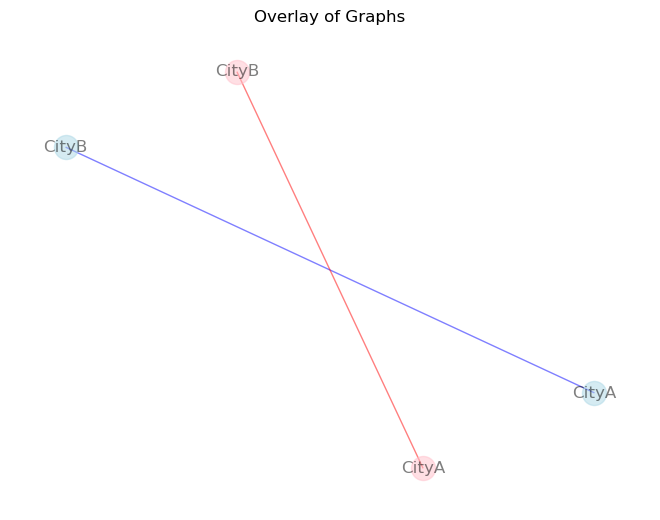

In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# Sample Graph Creation for Demonstration
# Replace this with your actual graphs
G_airlines = nx.Graph()
G_similarity = nx.Graph()

# Example: Adding nodes and weighted edges (replace with actual data)
G_airlines.add_edge('CityA', 'CityB', weight=3)  # Example: 3 airlines
G_similarity.add_edge('CityA', 'CityB', weight=0.8)  # Example: cosine similarity 0.8

# 1. Compare Nodes
def compare_nodes(graph1, graph2):
    nodes1 = set(graph1.nodes())
    nodes2 = set(graph2.nodes())
    common_nodes = nodes1 & nodes2
    print(f"Nodes in both graphs: {len(common_nodes)}")
    print(f"Nodes only in Graph 1: {len(nodes1 - nodes2)}")
    print(f"Nodes only in Graph 2: {len(nodes2 - nodes1)}")
    return common_nodes

common_nodes = compare_nodes(G_airlines, G_similarity)

# 2. Node Centrality Comparison
def compute_node_centrality(graph, centrality_type='degree'):
    if centrality_type == 'degree':
        return nx.degree_centrality(graph)
    elif centrality_type == 'closeness':
        return nx.closeness_centrality(graph)
    elif centrality_type == 'betweenness':
        return nx.betweenness_centrality(graph)
    else:
        raise ValueError("Invalid centrality type")

centrality_airlines = compute_node_centrality(G_airlines)
centrality_similarity = compute_node_centrality(G_similarity)

# Compare centralities (example: Pearson correlation)
airlines_values = np.array(list(centrality_airlines.values()))
similarity_values = np.array(list(centrality_similarity.values()))
correlation = pearsonr(airlines_values, similarity_values)
print(f"Centrality Correlation (Pearson): {correlation[0]:.3f}")

# 3. Compare Edge Weights
def compare_edge_weights(graph1, graph2):
    common_edges = set(graph1.edges()) & set(graph2.edges())
    
    if len(common_edges) < 2:
        print(f"Not enough common edges to calculate correlation. Found {len(common_edges)} common edges.")
        return None, None
    
    weights1 = np.array([graph1[u][v]['weight'] for u, v in common_edges])
    weights2 = np.array([graph2[u][v]['weight'] for u, v in common_edges])
    
    corr_pearson = pearsonr(weights1, weights2)
    corr_spearman = spearmanr(weights1, weights2)
    
    print(f"Edge Weight Correlation (Pearson): {corr_pearson[0]:.3f}")
    print(f"Edge Weight Correlation (Spearman): {corr_spearman[0]:.3f}")
    
    return corr_pearson, corr_spearman

compare_edge_weights(G_airlines, G_similarity)

# 4. Global Metrics
def compute_graph_metrics(graph):
    avg_path_length = nx.average_shortest_path_length(graph) if nx.is_connected(graph) else None
    clustering_coefficient = nx.average_clustering(graph)
    graph_diameter = nx.diameter(graph) if nx.is_connected(graph) else None
    print(f"Average Path Length: {avg_path_length}")
    print(f"Clustering Coefficient: {clustering_coefficient}")
    print(f"Graph Diameter: {graph_diameter}")

print("Metrics for Airline Graph:")
compute_graph_metrics(G_airlines)

print("Metrics for Similarity Graph:")
compute_graph_metrics(G_similarity)

# 5. Community Detection
def detect_communities(graph):
    from networkx.algorithms.community import greedy_modularity_communities
    communities = list(greedy_modularity_communities(graph))
    print(f"Detected {len(communities)} communities")
    return communities

print("Communities in Airline Graph:")
communities_airlines = detect_communities(G_airlines)

print("Communities in Similarity Graph:")
communities_similarity = detect_communities(G_similarity)

# 6. Overlay Analysis
def overlay_graphs(graph1, graph2):
    common_edges = set(graph1.edges()) & set(graph2.edges())
    print(f"Number of common edges: {len(common_edges)}")
    nx.draw(graph1, with_labels=True, node_color='lightblue', edge_color='blue', alpha=0.5)
    nx.draw(graph2, with_labels=True, node_color='pink', edge_color='red', alpha=0.5)
    plt.title("Overlay of Graphs")
    plt.show()

overlay_graphs(G_airlines, G_similarity)
